<a href="https://colab.research.google.com/github/MonirulIslamm08/Personalized-Medical-Recommendation/blob/main/Personalized_Medical_Recommendation_System_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
df.shape

(4920, 133)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
len(df['prognosis'].unique())

41

In [ ]:
df['prognosis'].value_counts()

,count
prognosis,
Fungal infection,120
Allergy,120
GERD,120
Chronic cholestasis,120
Drug Reaction,120
Peptic ulcer diseae,120
AIDS,120
Diabetes,120
Gastroenteritis,120


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#  Data Preprocessing

le = LabelEncoder()
df['prognosis'] = le.fit_transform(df['prognosis'])

In [ ]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training top models

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
models = {
     'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
     'XGBClassifier': XGBClassifier(random_state=42),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}



🔍 Training SVC...

SVC Accuracy: 1.0000
Classification Report:


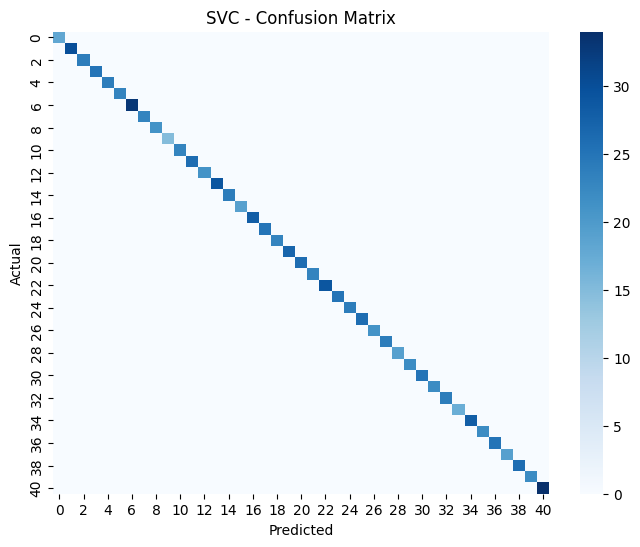




🔍 Training RandomForest...

RandomForest Accuracy: 1.0000
Classification Report:


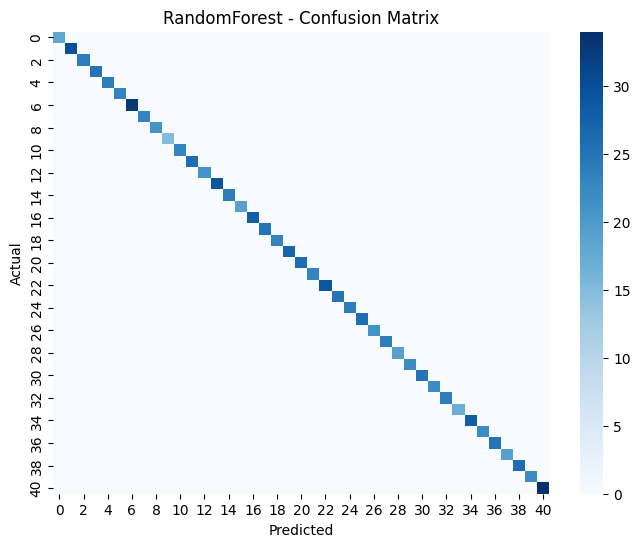




🔍 Training DecisionTree...

DecisionTree Accuracy: 1.0000
Classification Report:


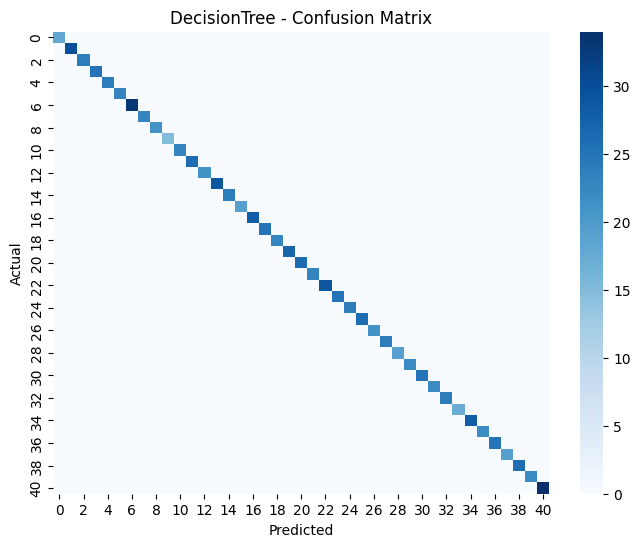




🔍 Training AdaBoost...

AdaBoost Accuracy: 0.0417
Classification Report:


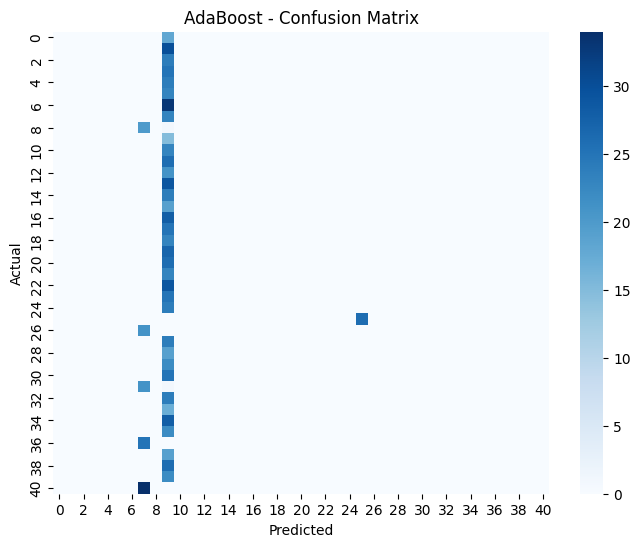




🔍 Training GradientBoosting...

GradientBoosting Accuracy: 1.0000
Classification Report:


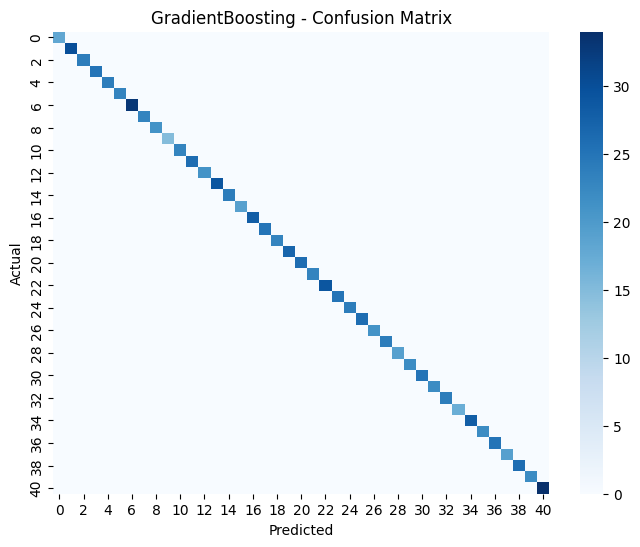




🔍 Training XGBClassifier...

XGBClassifier Accuracy: 1.0000
Classification Report:


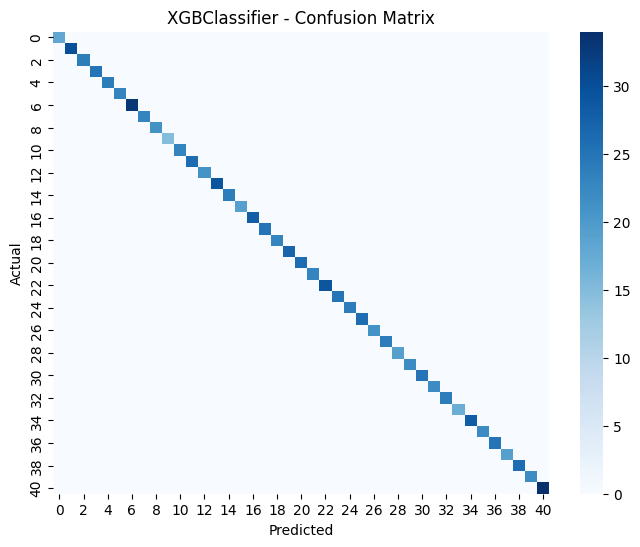




🔍 Training MultinomialNB...

MultinomialNB Accuracy: 1.0000
Classification Report:


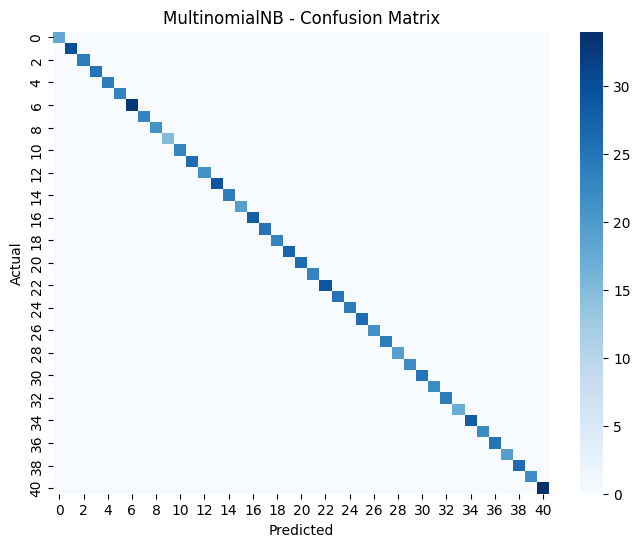




🔍 Training LogisticRegression...

LogisticRegression Accuracy: 1.0000
Classification Report:


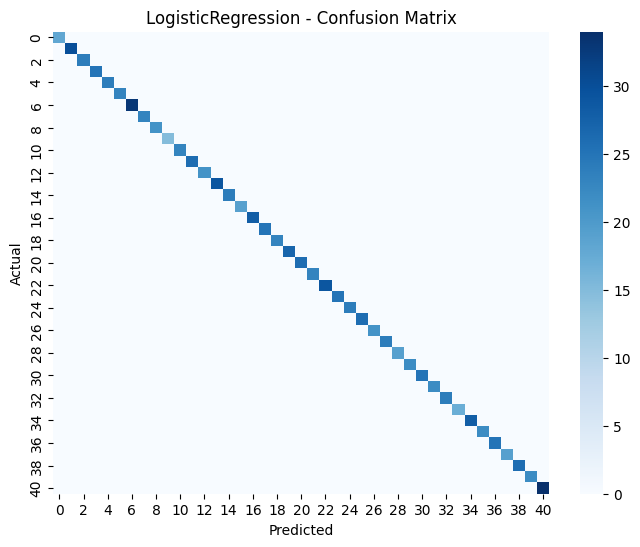




🔍 Training KNeighbors...

KNeighbors Accuracy: 1.0000
Classification Report:


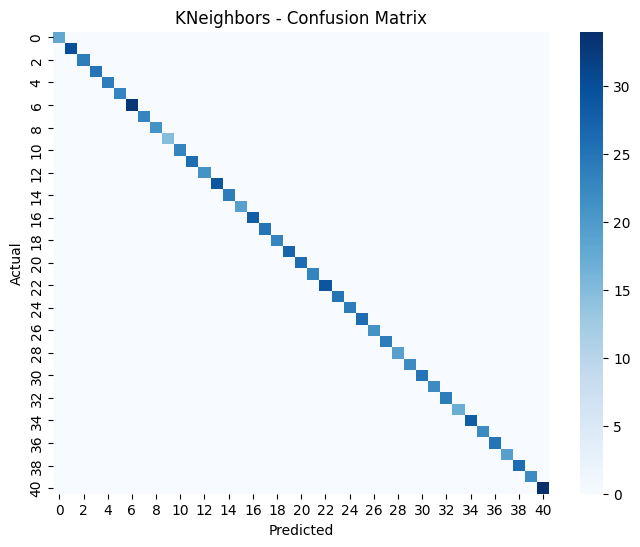

In [ ]:
for model_name, model in models.items():
    print(f"\n🔍 Training {model_name}...\n")

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    predictions = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Classification report
    print("Classification Report:")

    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='Blues', fmt='d', annot=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\n" + "="*60 + "\n")

#  Save Model with Pickle

In [ ]:
import pickle

# Save the model
with open("SVC_model.pkl", "wb") as file:
      pickle.dump(models['SVC'], file)

# Save the label encoder as well
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)


#  Load the Model Later

In [ ]:
# Load model
with open("SVC_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Load encoder
with open("label_encoder.pkl", "rb") as file:
    loaded_le = pickle.load(file)


# for Prediction

In [ ]:
X_test.iloc[0].values


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
sample = X_test.iloc[10]
pred = loaded_model.predict([sample])[0]
predicted_disease = loaded_le.inverse_transform([pred])[0]
print("Predicted Disease:", predicted_disease)


Predicted Disease: Urinary tract infection


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# test 2:
print("predicted disease :",loaded_model.predict(X_test.iloc[100].values.reshape(1,-1))) # Changed svc to loaded_model
print("Actual Disease :", y_test[100])

predicted disease : [23]
Actual Disease : 23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# load database and use logic for recommendations

In [ ]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [ ]:
# Sample patient symptoms (replace with actual input in real app)
input_symptoms = X_test.iloc[0].values.reshape(1, -1)

# Predict disease
pred_encoded = loaded_model.predict(input_symptoms)[0]
predicted_disease = le.inverse_transform([pred_encoded])[0]
print("Predicted Disease:", predicted_disease)


Predicted Disease: Acne


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Actual Column Names First

In [ ]:
print(description.columns)
print(precautions.columns)
print(medications.columns)
print(workout.columns)
print(diets.columns)


Index(['Disease', 'Description'], dtype='object')
Index(['Unnamed: 0', 'Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')
Index(['Disease', 'Medication'], dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'disease', 'workout'], dtype='object')
Index(['Disease', 'Diet'], dtype='object')


# get_recommendations() Function

In [ ]:
def get_recommendations(disease_name):
    rec = {}

    #  Description
    desc = description[description['Disease'] == disease_name]['Description'].values
    rec['Description'] = desc[0] if len(desc) else "N/A"

    #  Precautions
    prec_row = precautions[precautions['Disease'] == disease_name]
    if not prec_row.empty:
        rec['Precautions'] = [prec_row.iloc[0]['Precaution_1'],
                              prec_row.iloc[0]['Precaution_2'],
                              prec_row.iloc[0]['Precaution_3'],
                              prec_row.iloc[0]['Precaution_4']]
    else:
        rec['Precautions'] = []

    #  Medications
    meds = medications[medications['Disease'] == disease_name]['Medication'].values
    rec['Medications'] = meds.tolist() if len(meds) else []

    #  Diet
    diet = diets[diets['Disease'] == disease_name]['Diet'].values
    rec['Diet'] = diet.tolist() if len(diet) else []

    #  Workout (note lowercase 'disease' in column)
    work = workout[workout['disease'] == disease_name]['workout'].values
    rec['Workouts'] = work.tolist() if len(work) else []

    return rec


In [ ]:
recommendations = get_recommendations(predicted_disease)

print("\n Predicted Disease:", predicted_disease)
print("\n Description:", recommendations['Description'])
print("\n Medications:", ", ".join(recommendations['Medications']))
print("\n Diet Suggestions:", ", ".join(recommendations['Diet']))
print("\n Workout Suggestions:", ", ".join(recommendations['Workouts']))
print("\n Precautions:", ", ".join(recommendations['Precautions']))



🩺 Predicted Disease: Acne

📄 Description: Acne is a skin condition that occurs when hair follicles become clogged with oil and dead skin cells.

💊 Medications: ['Antibiotics', 'Pain relievers', 'Antihistamines', 'Corticosteroids', 'Topical treatments']

🍎 Diet Suggestions: ['Acne Diet', 'Low-Glycemic Diet', 'Hydration', 'Fruits and vegetables', 'Probiotics']

🏃‍♀️ Workout Suggestions: Consume a balanced diet, Limit dairy and high-glycemic foods, Include antioxidants, Stay hydrated, Limit processed foods, Include zinc-rich foods, Consult a skincare professional, Practice good skincare hygiene, Limit sugary foods and beverages, Follow medical recommendations

⚠️ Precautions: bath twice, avoid fatty spicy food, drink plenty of water, avoid too many products


# test prediction in this Model

In [ ]:
user_symptoms = input("Enter your symptoms.......")

input_vector = [1 if symptom in user_symptoms else 0 for symptom in X.columns]

pred = loaded_model.predict([input_vector])[0]
predicted_disease = le.inverse_transform([pred])[0]

recommendations = get_recommendations(predicted_disease)

print(" Disease:", predicted_disease)
print(" Description:", recommendations['Description'])
print(" Medications:", ', '.join(recommendations['Medications']))
print(" Diet:", ', '.join(recommendations['Diet']))
print(" Workout:", ', '.join(recommendations['Workouts']))
print(" Precautions:", ', '.join(recommendations['Precautions']))


Enter your symptoms.......joint_pain	stomach_pain	acidity
 Disease: GERD
 Description: GERD (Gastroesophageal Reflux Disease) is a digestive disorder that affects the lower esophageal sphincter.
 Medications: ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers', 'Antacids', 'Prokinetics', 'Antibiotics']
 Diet: ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger', 'Licorice', 'Aloe vera juice']
 Workout: Consume smaller meals, Avoid trigger foods (spicy, fatty), Eat high-fiber foods, Limit caffeine and alcohol, Chew food thoroughly, Avoid late-night eating, Consume non-citrus fruits, Include lean proteins, Stay hydrated, Avoid carbonated beverages
 Precautions: avoid fatty spicy food, avoid lying down after eating, maintain healthy weight, exercise


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1
